In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [3]:
train_dt = pd.read_csv("train.csv")
test_dt = pd.read_csv("test.csv")
train_dt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
dt = train_dt.copy()

In [5]:
dt.shape

(2000, 21)

In [6]:
dt.dtypes.value_counts()

int64      19
float64     2
dtype: int64

In [7]:
(dt.isna().sum()/dt.shape[0]).sort_values(ascending=True)

battery_power    0.0
touch_screen     0.0
three_g          0.0
talk_time        0.0
sc_w             0.0
sc_h             0.0
ram              0.0
px_width         0.0
px_height        0.0
wifi             0.0
pc               0.0
mobile_wt        0.0
m_dep            0.0
int_memory       0.0
four_g           0.0
fc               0.0
dual_sim         0.0
clock_speed      0.0
blue             0.0
n_cores          0.0
price_range      0.0
dtype: float64

In [8]:
dt["price_range"].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(dt.drop(columns=["price_range"]),dt["price_range"],test_size=0.2)

In [29]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [30]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=15),StandardScaler())

In [31]:
ada = make_pipeline(preprocessor,AdaBoostClassifier())
grad = make_pipeline(preprocessor,GradientBoostingClassifier())
knn = make_pipeline(preprocessor,KNeighborsClassifier())
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

In [32]:
dict_of_models = {'ada' : ada,
                  'grad': grad,
                  "knn": knn,
                  "svm":SVM,
                  "randomforest":RandomForest
                 }

In [33]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [34]:
def evaluation(model,name):
    
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, x_train, y_train,
                                              cv=4,
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.title(name)
    plt.legend()

ada
[[94  9  0  0]
 [ 7 89 13  0]
 [ 0 22 66  8]
 [ 0  0 15 77]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       103
           1       0.74      0.82      0.78       109
           2       0.70      0.69      0.69        96
           3       0.91      0.84      0.87        92

    accuracy                           0.81       400
   macro avg       0.82      0.81      0.82       400
weighted avg       0.82      0.81      0.82       400

grad
[[ 99   4   0   0]
 [  2 101   6   0]
 [  0   9  84   3]
 [  0   0   8  84]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       103
           1       0.89      0.93      0.91       109
           2       0.86      0.88      0.87        96
           3       0.97      0.91      0.94        92

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92     

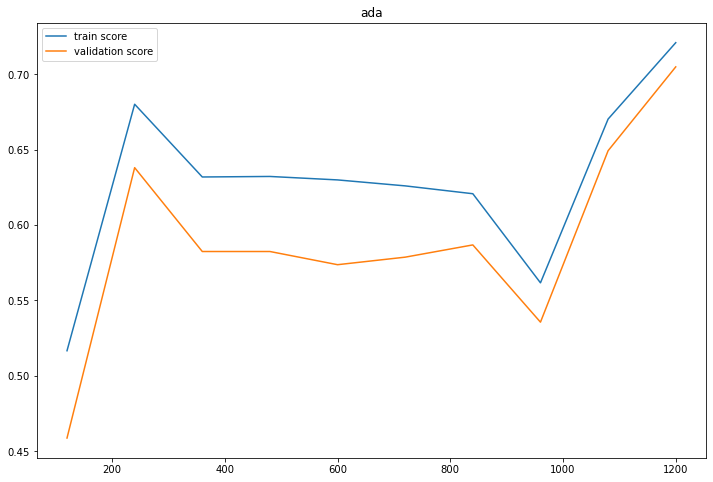

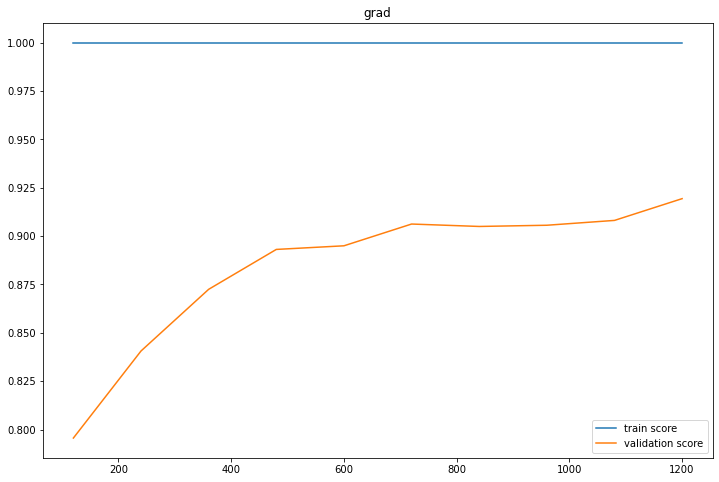

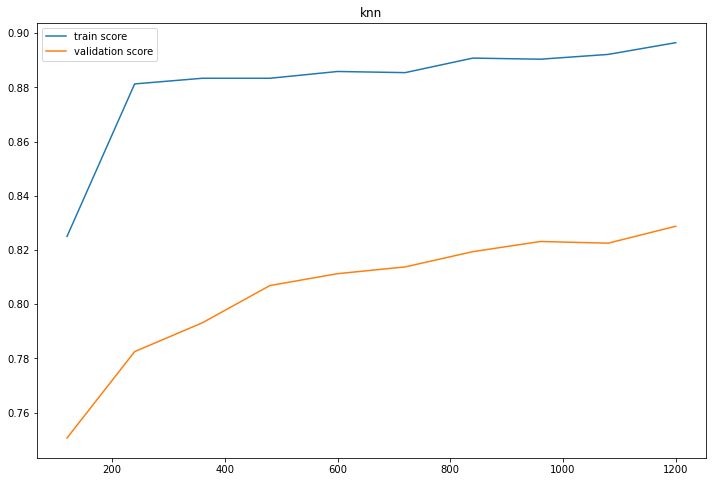

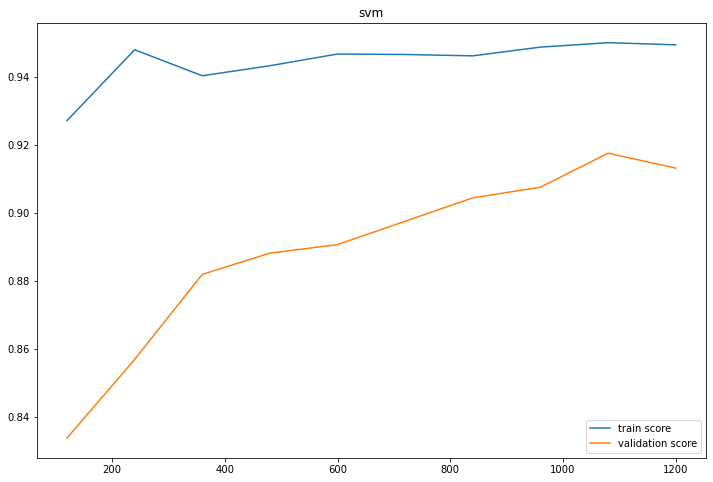

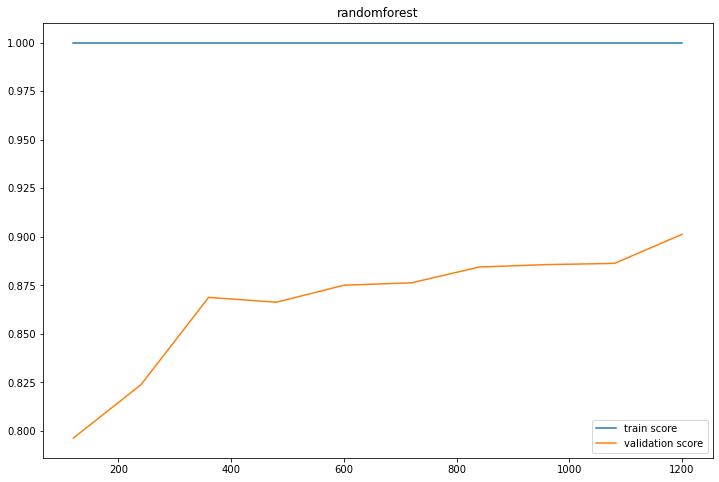

In [35]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model,name)

In [37]:
x_train = StandardScaler().fit_transform(x_train)

In [54]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

In [55]:
label_as_binary = LabelBinarizer()
y_train = label_as_binary.fit_transform(y_train)

In [56]:
x_train.shape

(1600, 20)

In [68]:
def model(inputs):
    x = tf.keras.layers.Dense(16, activation = 'relu')(inputs)
    #x = tf.keras.layers.Dense(8, activation = 'relu')(x)
    out = tf.keras.layers.Dense(4, activation = 'sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=out)
    return model

In [69]:
inputs = tf.keras.layers.Input(shape=(20,))
model = model(inputs)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 20)]              0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 68        
Total params: 404
Trainable params: 404
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss = "categorical_crossentropy", metrics = ["accuracy"])

In [71]:
history = model.fit(x_train, y_train,validation_split=0.2,
                    batch_size =10,
                      epochs=50)

Epoch 1/50
128/128 [==============================] - 1s 4ms/step - loss: 1.6275 - accuracy: 0.2508 - val_loss: 1.5092 - val_accuracy: 0.2188
Epoch 2/50
128/128 [==============================] - 0s 2ms/step - loss: 1.3852 - accuracy: 0.3180 - val_loss: 1.3364 - val_accuracy: 0.3344
Epoch 3/50
128/128 [==============================] - 0s 2ms/step - loss: 1.2226 - accuracy: 0.4563 - val_loss: 1.1987 - val_accuracy: 0.4062
Epoch 4/50
128/128 [==============================] - 0s 2ms/step - loss: 1.0818 - accuracy: 0.5375 - val_loss: 1.0706 - val_accuracy: 0.5000
Epoch 5/50
128/128 [==============================] - 0s 2ms/step - loss: 0.9566 - accuracy: 0.6008 - val_loss: 0.9547 - val_accuracy: 0.6062
Epoch 6/50
128/128 [==============================] - 0s 2ms/step - loss: 0.8494 - accuracy: 0.6555 - val_loss: 0.8578 - val_accuracy: 0.6687
Epoch 7/50
128/128 [==============================] - 0s 2ms/step - loss: 0.7592 - accuracy: 0.7031 - val_loss: 0.7763 - val_accuracy: 0.7000
Epoch 

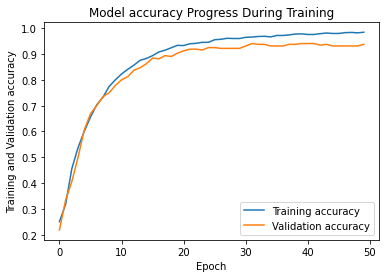

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'])

In [79]:
x_test = StandardScaler().fit_transform(x_test)
y_test = label_as_binary.fit_transform(y_test)
loss, accuracy = model.evaluate(x_test, y_test)
print("accuracy : ", accuracy)

13/13 [==============================] - 0s 3ms/step - loss: 0.1186 - accuracy: 0.9725
accuracy :  0.9725000262260437


In [81]:
model.save('model.h5')

In [82]:
model = tf.keras.models.load_model('model.h5')

In [99]:
X , Y = train_dt.drop(columns=["price_range"]),train_dt["price_range"]

In [100]:
X_1= StandardScaler().fit_transform(X)

In [101]:
Ypred = np.argmax(model.predict(X_1),axis=1)

<AxesSubplot:>

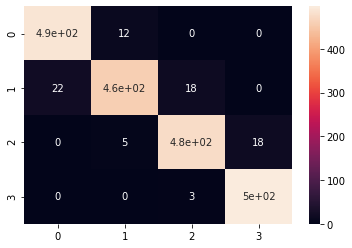

In [106]:
sns.heatmap(confusion_matrix(Y, Ypred),annot=True)

In [108]:
print(classification_report(Y, Ypred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       500
           1       0.96      0.92      0.94       500
           2       0.96      0.95      0.96       500
           3       0.97      0.99      0.98       500

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000

